<div class="alert alert-info">
  <strong>This backtest is flawed and oversimplified. Please do your own due diligenceThis backtest is flawed and oversimplified. Please do your own due diligence</strong>
</div>
<div class="alert alert-info"><div class="alert alert-info">
This material is not intended to be relied upon as a forecast, research 
or investment advice, and is not a recommendation. Past performance is 
not always indicative of future returns. I may or may not own stocks listed
</div></div>


This is a repost of an old article that I did as an Acorns backtest. Only difference is that that time I did it in RStudio and exported it out as html. My static blog generator under Windows Linux Subsystem does not like it. This is a port over to Jupyter Notebook which Nicola natively supports.

**Synopsis**

I have been an investor in
   [Acorns](https://www.acorns.com/invite/8JS4AZ) since around
   September 2017. I learned about Acorns as a “Millenial savings
   account.” I did a “why not” investing. Plus I like squirreling away
   money that is not visible to me or others.

I had chosen the “Aggressive Portfolio” instead of the recommended
“Conservative Portfolio.” The reason was that I was adviced long ago
that my Social Security and Pension was my bond fund.

Purpose of this post is to backtest the
[Acorns](https://www.acorns.com/invite/8JS4AZ) investment style in
a reproducible way reasonably. I will admit that the backtest is
*flawed and oversimplified*.
[Acorns](https://www.acorns.com/invite/8JS4AZ) rebalances every
time you add
money [Acorns](https://www.acorns.com/invite/8JS4AZ).
Also, [Acorns](https://www.acorns.com/invite/8JS4AZ) does a full
rebalance every quarter. I will not capture tax implications. The
starting date will be from January 1st, 2011 till the time of this
post. The reason is that the first data for VOO is September 2010. I
hope that this will have value for you.



-  Large Company - VOO
-  Small Company - VB
-  Developed Market - VEA
-  Emerging Market - VWO
-  Real Estate - VNQ
-  Corporate Bond - LQD
-  Government Bond - SHY
-  Spiders - SPY benchmark.
-  ^IRX - 13 WEEK TREASURY BILL as risk free rate

<!-- TEASER_END -->

First lets get the data…

In [35]:
library(quantmod)
library(tseries)
library(PerformanceAnalytics)
library(xts)
library(xtable)
library(lubridate)

In [36]:
spy <-get.hist.quote(instrument="spy",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
voo <-get.hist.quote(instrument="voo",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
vb <-get.hist.quote(instrument="vb",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
vea <-get.hist.quote(instrument="vea",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
vwo <-get.hist.quote(instrument="vwo",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
vnq <-get.hist.quote(instrument="vnq",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
lqd <-get.hist.quote(instrument="lqd",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
shy <-get.hist.quote(instrument="shy",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")
tbill <- get.hist.quote(instrument="^irx",start="2011-01-01",end="2020-01-01",quote="AdjClose",compression="d")

time series starts 2011-01-03
time series ends   2019-12-31
time series starts 2011-01-03
time series ends   2019-12-31
time series starts 2011-01-03
time series ends   2019-12-31
time series starts 2011-01-03
time series ends   2019-12-31
time series starts 2011-01-03
time series ends   2019-12-31
time series starts 2011-01-03
time series ends   2019-12-31
time series starts 2011-01-03
time series ends   2019-12-31
time series starts 2011-01-03
time series ends   2019-12-31


Warning message:
"^irx contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


time series starts 2011-01-03
time series ends   2019-12-31


   **Benchmarks**

   The SP500 tends to evaluate the market and market managers. I plan to
   use *SPY* since that is my benchmark. SPY is something that I can
   buy, and it is the litmus test to whether I put in work to manage my
   portfolio or buy SPY and forget about it.

   [Lastly only 20% of active managers beat it](https://www.cnbc.com/2019/03/15/active-fund-managers-trail-the-sp-500-for-the-ninth-year-in-a-row-in-triumph-for-indexing.html)

      Long-term, the numbers were not much better in other categories
      like small-cap stocks or fixed income: “Over long-term horizons,
      80 percent or more of active managers across all categories
      underperformed their respective benchmarks,” the report concluded.

   For the [risk free rate][https://www.investopedia.com/terms/r/risk-freerate.asp>] I
   plan to use the total returns for the [13 WEEK TREASURY BILL (^IRX)](https://finance.yahoo.com/quote/%5EIRX>)

   Before going over the Acorn porfolios, lets do the analysis of SPY
   first.

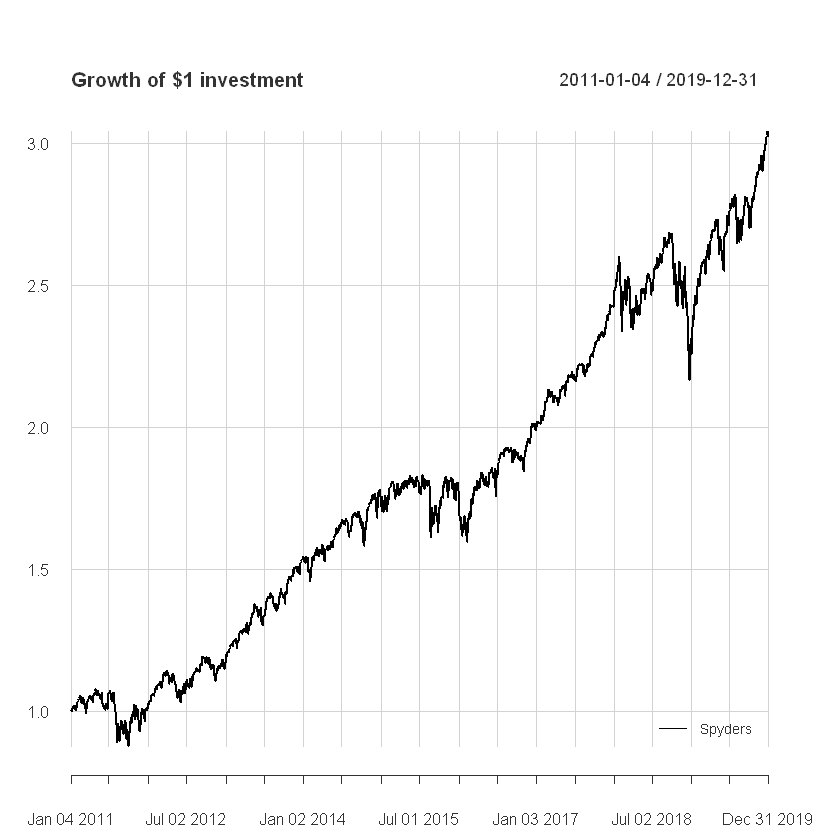

In [37]:
returns.tbil <- na.omit(ROC(as.xts(tbill),1,"discrete"))

returns.spy <- na.omit(ROC(as.xts(spy),1,"discrete"))
names(returns.spy) <- c("Spyders")

chart.CumReturns(returns.spy,
               wealth.index=TRUE,
               legend.loc="bottomright",
               main="Growth of $1 investment",
               ylab="$")

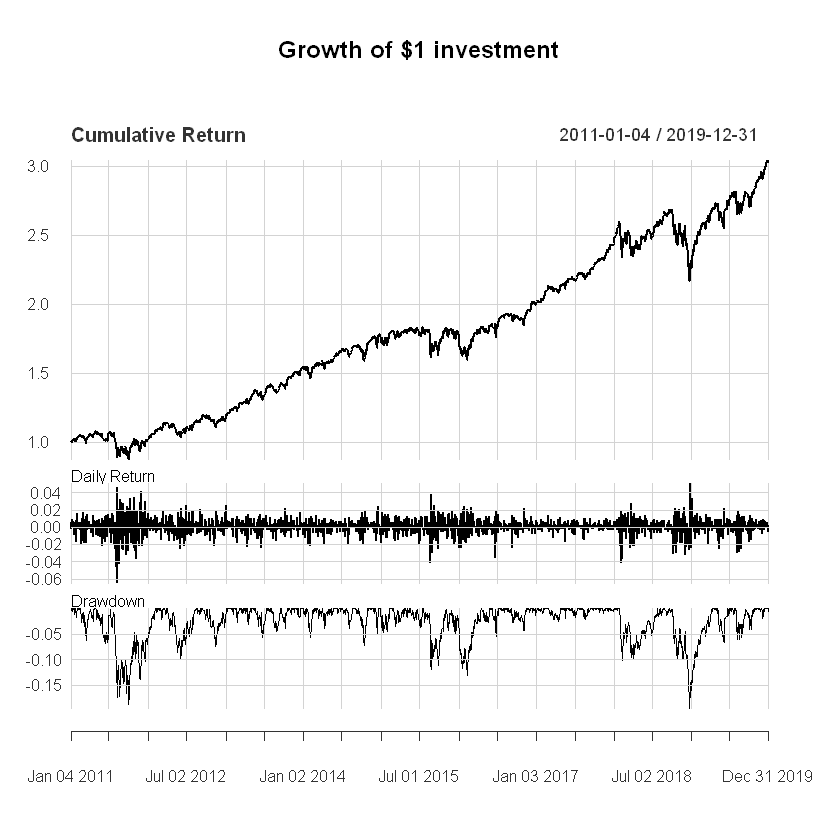

In [38]:
charts.PerformanceSummary(returns.spy,
               wealth.index=TRUE,
               legend.loc="bottomright",
               main="Growth of $1 investment",Rf = tbil.return)

In [39]:
# Compare return/risk
knitr::kable(rbind(table.AnnualizedReturns(returns.spy),SharpeRatio.annualized(returns.spy),CalmarRatio(returns.spy)))



|                                |   Spyders|
|:-------------------------------|---------:|
|Annualized Return               | 0.1316000|
|Annualized Std Dev              | 0.1430000|
|Annualized Sharpe (Rf=0%)       | 0.9203000|
|Annualized Sharpe Ratio (Rf=0%) | 0.9202605|
|Calmar Ratio                    | 0.6800352|

In [40]:
knitr::kable(table.Drawdowns(returns.spy))



|From       |Trough     |To         |   Depth| Length| To Trough| Recovery|
|:----------|:----------|:----------|-------:|------:|---------:|--------:|
|2018-09-21 |2018-12-24 |2019-04-12 | -0.1935|    140|        65|       75|
|2011-05-02 |2011-10-03 |2012-02-03 | -0.1861|    193|       108|       85|
|2015-07-21 |2016-02-11 |2016-04-18 | -0.1302|    188|       143|       45|
|2018-01-29 |2018-02-08 |2018-08-06 | -0.1010|    132|         9|      123|
|2012-04-03 |2012-06-04 |2012-08-16 | -0.0969|     95|        43|       52|

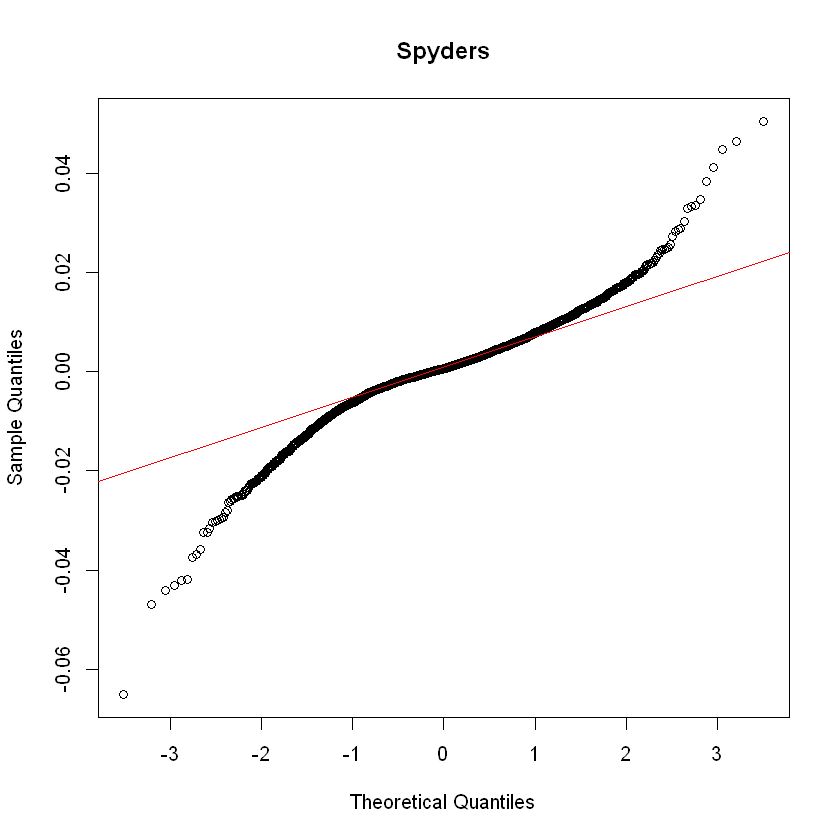

In [41]:
qqnorm(returns.spy,main="Spyders")
qqline(returns.spy,col="red")

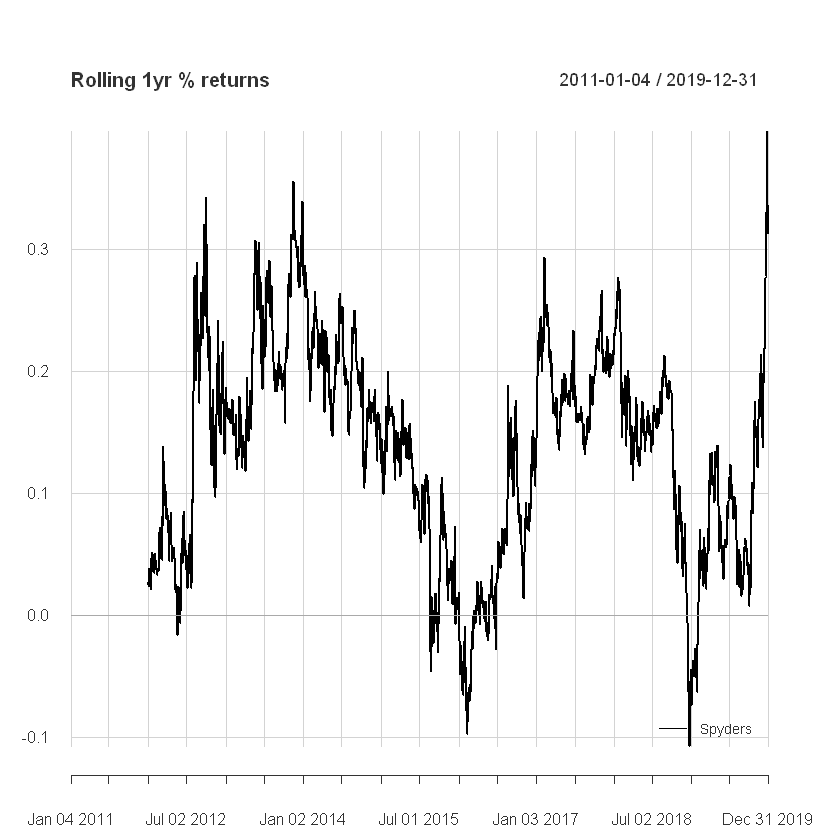

In [42]:
chart.RollingPerformance(returns.spy,width=252,
                               legend.loc="bottomright",
                               main="Rolling 1yr % returns")


**Portfolios**

Acorns has five portfolios

**Conservative**




|                                | Conservative Portfolio|
|:-------------------------------|----------------------:|
|Annualized Return               |               0.049000|
|Annualized Std Dev              |               0.034900|
|Annualized Sharpe (Rf=0%)       |               1.404700|
|Annualized Sharpe Ratio (Rf=0%) |               1.404713|
|Calmar Ratio                    |               1.087724|



|From       |Trough     |To         |   Depth| Length| To Trough| Recovery|
|:----------|:----------|:----------|-------:|------:|---------:|--------:|
|2013-05-22 |2013-06-24 |2013-10-22 | -0.0451|    107|        23|       84|
|2018-01-29 |2018-12-24 |2019-01-31 | -0.0428|    254|       229|       25|
|2015-04-27 |2016-01-21 |2016-03-31 | -0.0414|    235|       187|       48|
|2011-10-31 |2011-11-25 |2012-01-10 | -0.0358|     49|        19|       30|
|2011-07-25 |2011-10-03 |2011-10-27 | -0.0356|     68|        50|       18|

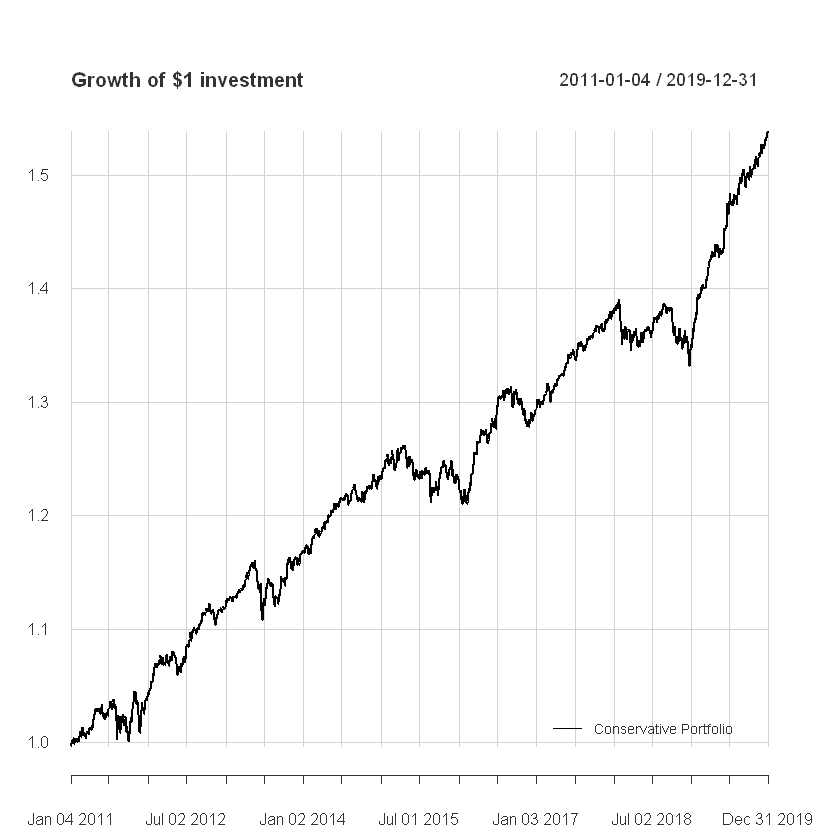

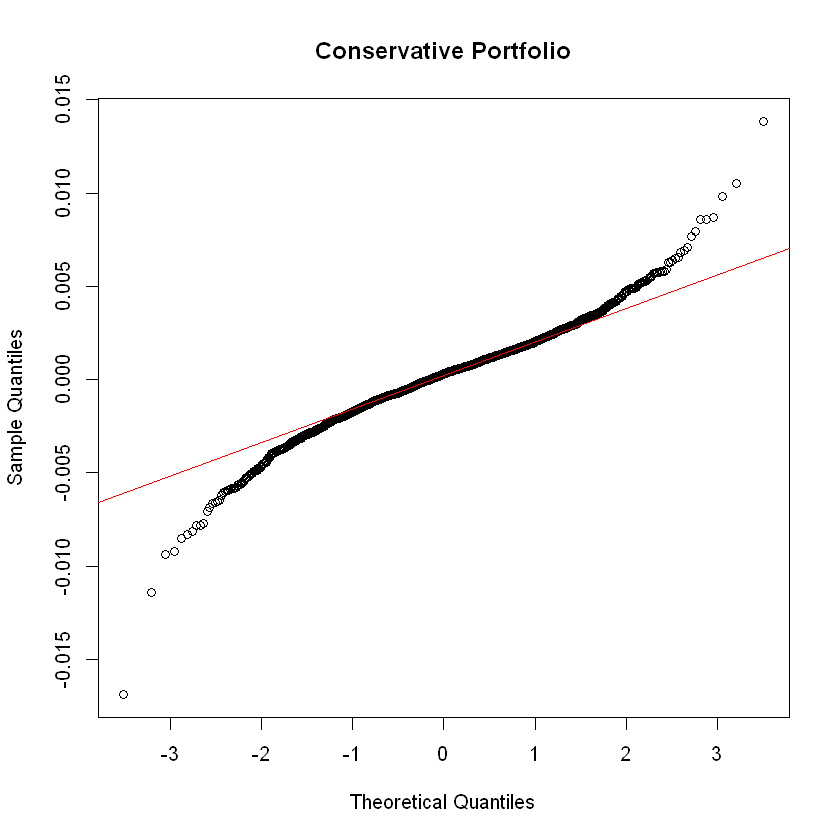

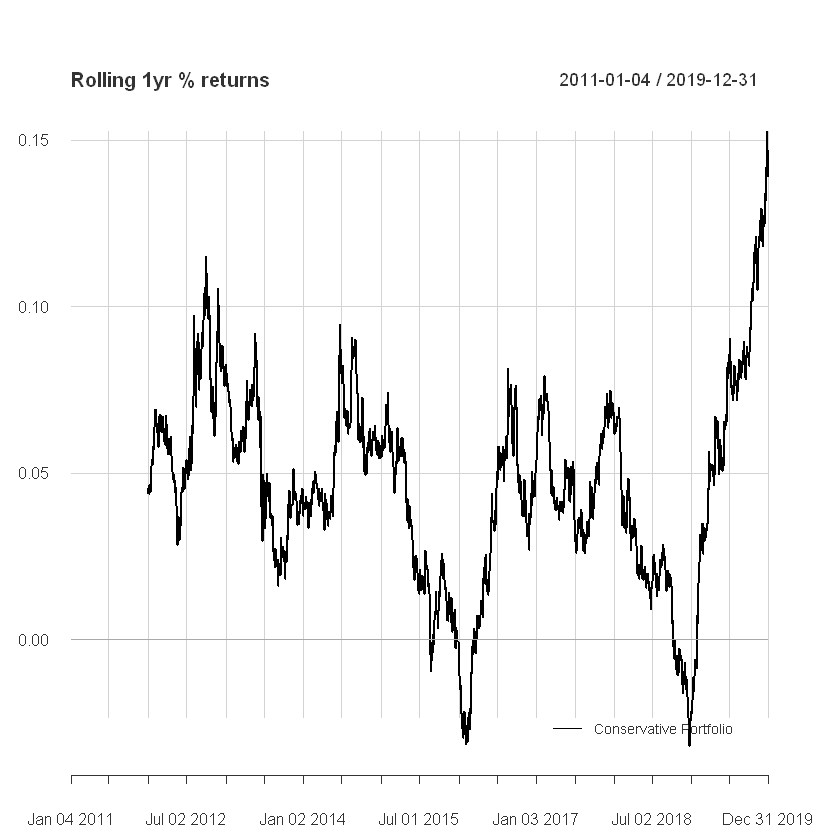

In [43]:
  w <- c(.12, .02, .02, .40, .40, .04)
  portfolio.prices <- as.xts(merge(voo,vb,vnq,shy,lqd,vea))
  portfolio.returns <- na.omit(ROC(portfolio.prices,1,"discrete"))
  colnames(portfolio.returns) <- c("voo","vb","vnq","shy","lqd","vea")

  # calculate portfolio total returns
  # rebalanced portfolio
  # calculate portfolio total returns
  # rebalanced portfolio
  portfolio.conservative <-Return.portfolio(portfolio.returns,
                                     rebalance_on="months",
                                     weights=w,wealth.index=TRUE,verbose=TRUE)
  returns <- portfolio.conservative$returns
  names(returns) <- c("Conservative Portfolio")

  # merge portfolio returns into one dataset
  # label columns

  # names(portfolio) <-c("Conservative")

  chart.CumReturns(returns,
                   wealth.index=TRUE,
                   legend.loc="bottomright",
                   main="Growth of $1 investment",
                   ylab="$")
knitr::kable(rbind(table.AnnualizedReturns(returns),SharpeRatio.annualized(returns),CalmarRatio(returns)))
knitr::kable(table.Drawdowns(returns))
# Compare portfolio return distribution vs. normal distribution
qqnorm(returns,main="Conservative Portfolio")
qqline(returns,col="red")
# Compare rolling 1-year returns
chart.RollingPerformance(returns,width=252,
                       legend.loc="bottomright",
                       main="Rolling 1yr % returns")

**Moderately Conservative**



|                                | Moderately Conservative Portfolio|
|:-------------------------------|---------------------------------:|
|Annualized Return               |                         0.0653000|
|Annualized Std Dev              |                         0.0581000|
|Annualized Sharpe (Rf=0%)       |                         1.1227000|
|Annualized Sharpe Ratio (Rf=0%) |                         1.1226675|
|Calmar Ratio                    |                         0.8170025|



|From       |Trough     |To         |   Depth| Length| To Trough| Recovery|
|:----------|:----------|:----------|-------:|------:|---------:|--------:|
|2011-07-25 |2011-10-03 |2012-01-19 | -0.0799|    124|        50|       74|
|2018-08-30 |2018-12-24 |2019-02-19 | -0.0763|    117|        80|       37|
|2015-04-27 |2016-02-11 |2016-04-13 | -0.0684|    244|       202|       42|
|2013-05-22 |2013-06-24 |2013-10-16 | -0.0528|    103|        23|       80|
|2018-01-29 |2018-03-23 |2018-08-27 | -0.0475|    147|        39|      108|

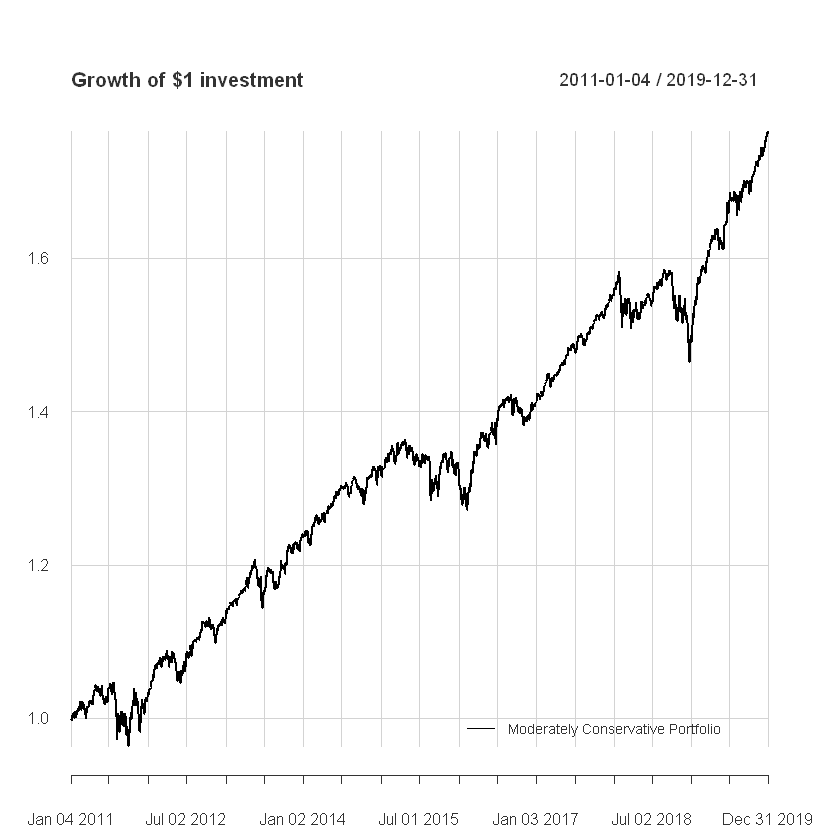

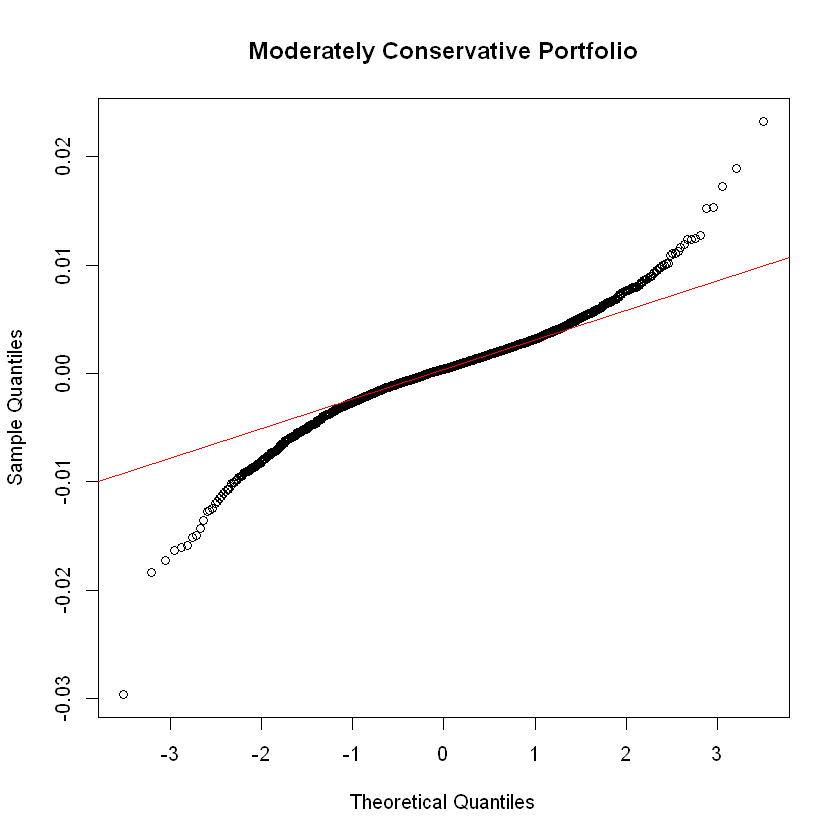

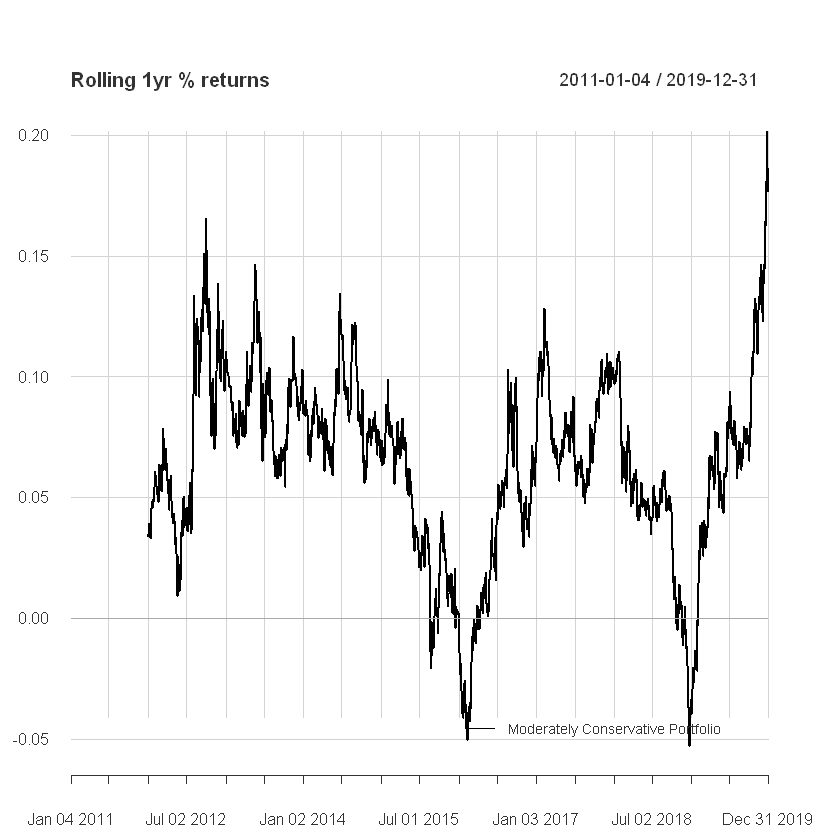

In [44]:
w <- c(.24, .04, .04, .30, .30, .08)
portfolio.prices <- as.xts(merge(voo,vb,vnq,shy,lqd,vea))
portfolio.returns <- na.omit(ROC(portfolio.prices,1,"discrete"))
colnames(portfolio.returns) <- c("voo","vb","vnq","shy","lqd","vea")


portfolio.moderately_conservative <-Return.portfolio(portfolio.returns,
                                 rebalance_on="months",
                                 weights=w,wealth.index=TRUE,verbose=TRUE)

returns <- portfolio.moderately_conservative$returns
names(returns) <- c("Moderately Conservative Portfolio")

# merge portfolio returns into one dataset
# label columns

# names(portfolio) <-c("Moderately Conservative")

chart.CumReturns(returns,
               wealth.index=TRUE,
               legend.loc="bottomright",
               main="Growth of $1 investment",
               ylab="$")
knitr::kable(rbind(table.AnnualizedReturns(returns),SharpeRatio.annualized(returns),CalmarRatio(returns)))
knitr::kable(table.Drawdowns(returns))
# Compare portfolio return distribution vs. normal distribution
qqnorm(returns,main="Moderately Conservative Portfolio")
qqline(returns,col="red")
# Compare rolling 1-year returns
chart.RollingPerformance(returns,width=252,
                       legend.loc="bottomright",
                       main="Rolling 1yr % returns")

**Moderate**



|                                | Moderate Portfolio|
|:-------------------------------|------------------:|
|Annualized Return               |          0.0772000|
|Annualized Std Dev              |          0.0874000|
|Annualized Sharpe (Rf=0%)       |          0.8838000|
|Annualized Sharpe Ratio (Rf=0%) |          0.8837680|
|Calmar Ratio                    |          0.5841138|



|From       |Trough     |To         |   Depth| Length| To Trough| Recovery|
|:----------|:----------|:----------|-------:|------:|---------:|--------:|
|2011-05-02 |2011-10-03 |2012-02-03 | -0.1322|    193|       108|       85|
|2018-08-30 |2018-12-24 |2019-03-18 | -0.1129|    136|        80|       56|
|2015-04-27 |2016-02-11 |2016-06-07 | -0.1068|    282|       202|       80|
|2012-04-03 |2012-06-04 |2012-08-06 | -0.0642|     87|        43|       44|
|2018-01-29 |2018-02-08 |2018-08-27 | -0.0640|    147|         9|      138|

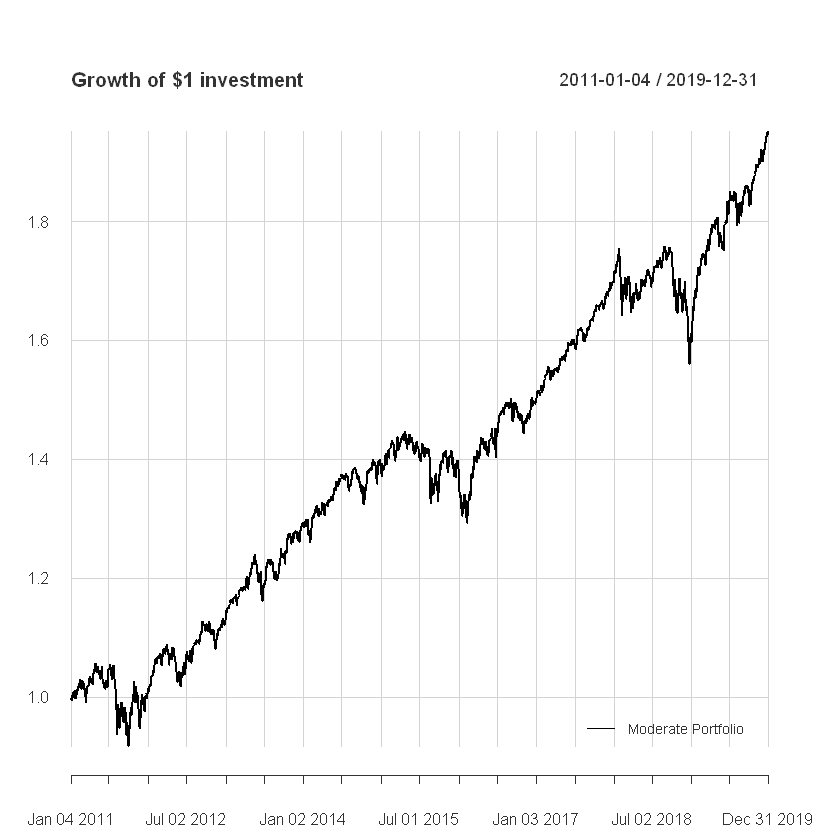

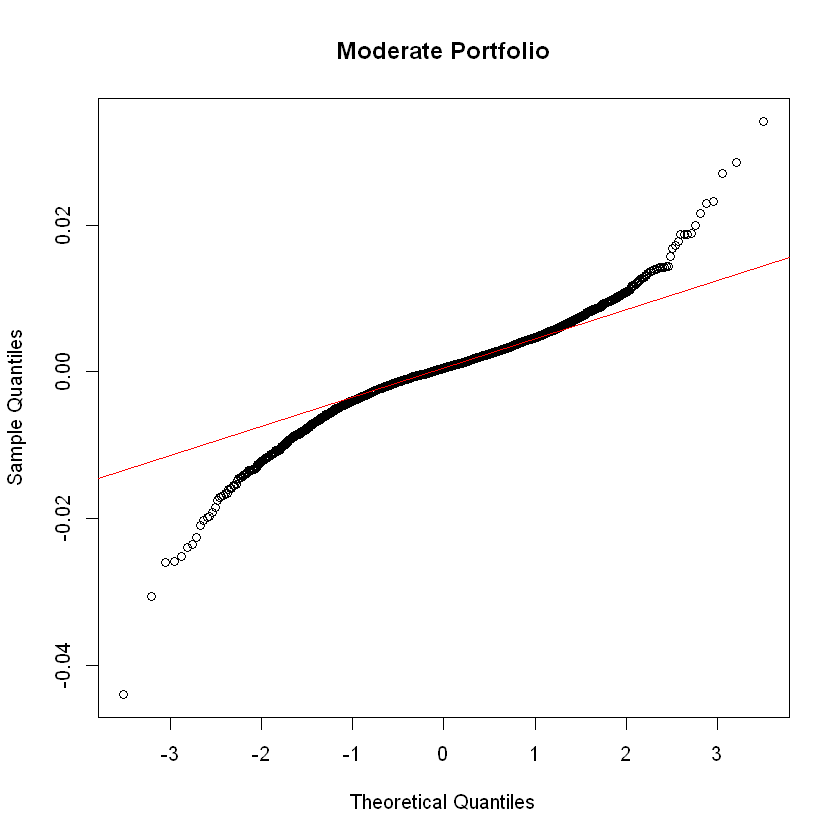

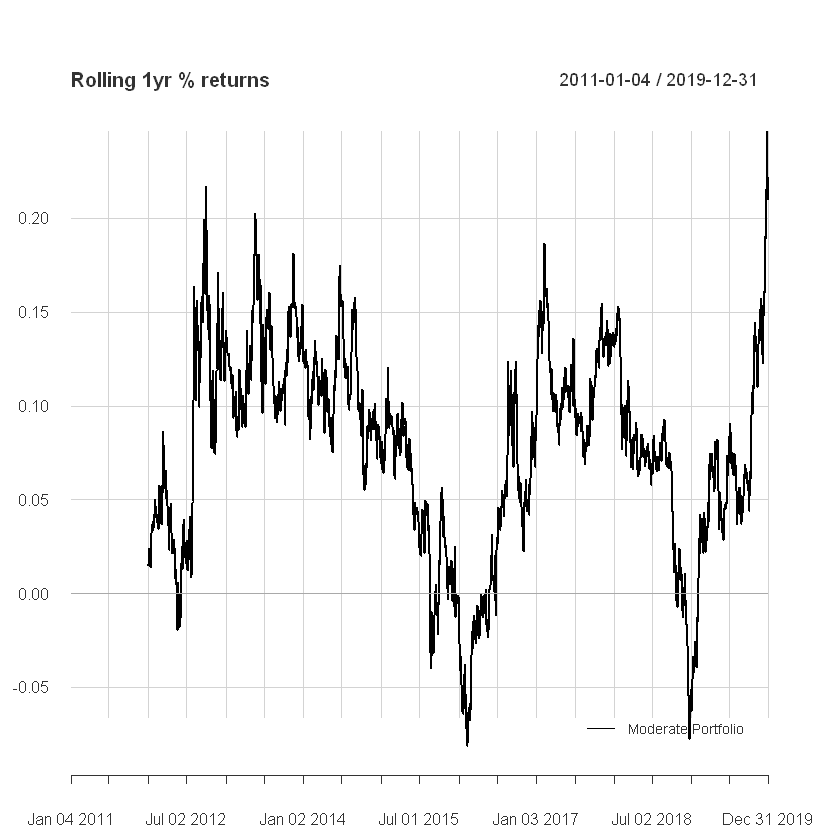

In [45]:
  w <- c(.29, .10, .03, .06, .20,.20,.12)
  portfolio.prices <- as.xts(merge(voo,vb,vwo,vnq,shy,lqd,vea))
  portfolio.returns <- na.omit(ROC(portfolio.prices,1,"discrete"))
  colnames(portfolio.returns) <- c("voo","vb","vwo","vnq","shy","lqd","vea")


  portfolio.moderate <-Return.portfolio(portfolio.returns,
                                     rebalance_on="months",
                                     weights=w,wealth.index=TRUE,verbose=TRUE)

  returns <- portfolio.moderate$returns
  names(returns) <- c("Moderate Portfolio")

  # merge portfolio returns into one dataset
  # label columns

  # names(portfolio) <-c("Moderately")

  chart.CumReturns(returns,
                   wealth.index=TRUE,
                   legend.loc="bottomright",
                   main="Growth of $1 investment",
                   ylab="$")
knitr::kable(rbind(table.AnnualizedReturns(returns),SharpeRatio.annualized(returns),CalmarRatio(returns)))
knitr::kable(table.Drawdowns(returns))
# Compare portfolio return distribution vs. normal distribution
qqnorm(returns,main="Moderate Portfolio")
qqline(returns,col="red")
# Compare rolling 1-year returns
chart.RollingPerformance(returns,width=252,
                       legend.loc="bottomright",
                       main="Rolling 1yr % returns")

**Moderately Aggressive**



|                                | Moderate Aggressive Portfolio|
|:-------------------------------|-----------------------------:|
|Annualized Return               |                     0.0912000|
|Annualized Std Dev              |                     0.1170000|
|Annualized Sharpe (Rf=0%)       |                     0.7796000|
|Annualized Sharpe Ratio (Rf=0%) |                     0.7796043|
|Calmar Ratio                    |                     0.5051996|



|From       |Trough     |To         |   Depth| Length| To Trough| Recovery|
|:----------|:----------|:----------|-------:|------:|---------:|--------:|
|2011-05-02 |2011-10-03 |2012-02-28 | -0.1805|    209|       108|      101|
|2018-08-30 |2018-12-24 |2019-04-01 | -0.1493|    146|        80|       66|
|2015-04-27 |2016-02-11 |2016-07-08 | -0.1376|    304|       202|      102|
|2012-04-03 |2012-06-04 |2012-08-17 | -0.0879|     96|        43|       53|
|2018-01-29 |2018-02-08 |2018-08-27 | -0.0814|    147|         9|      138|

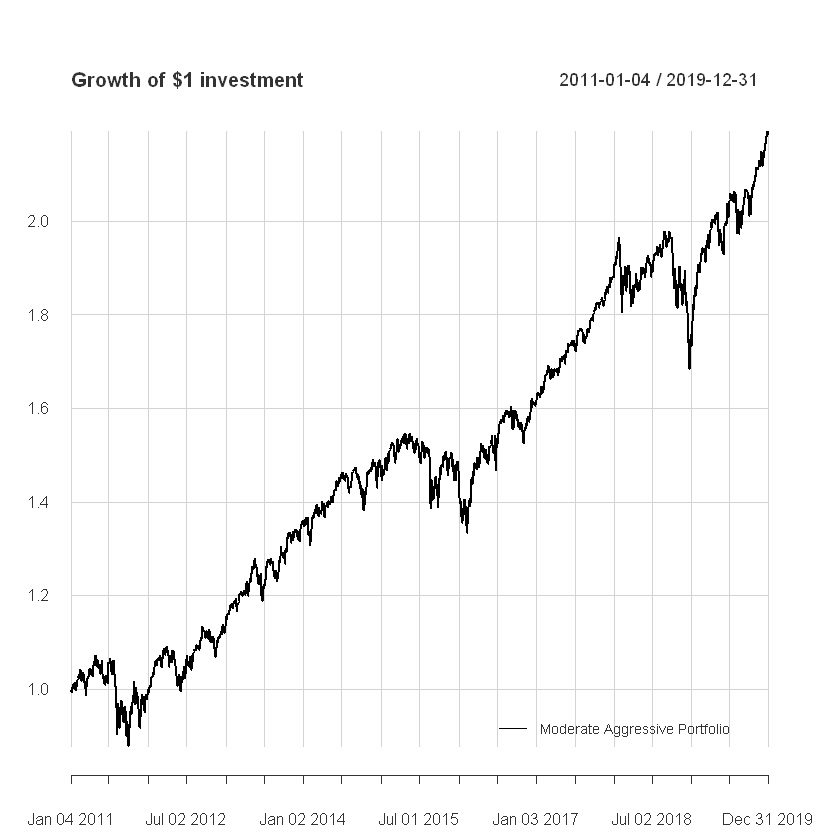

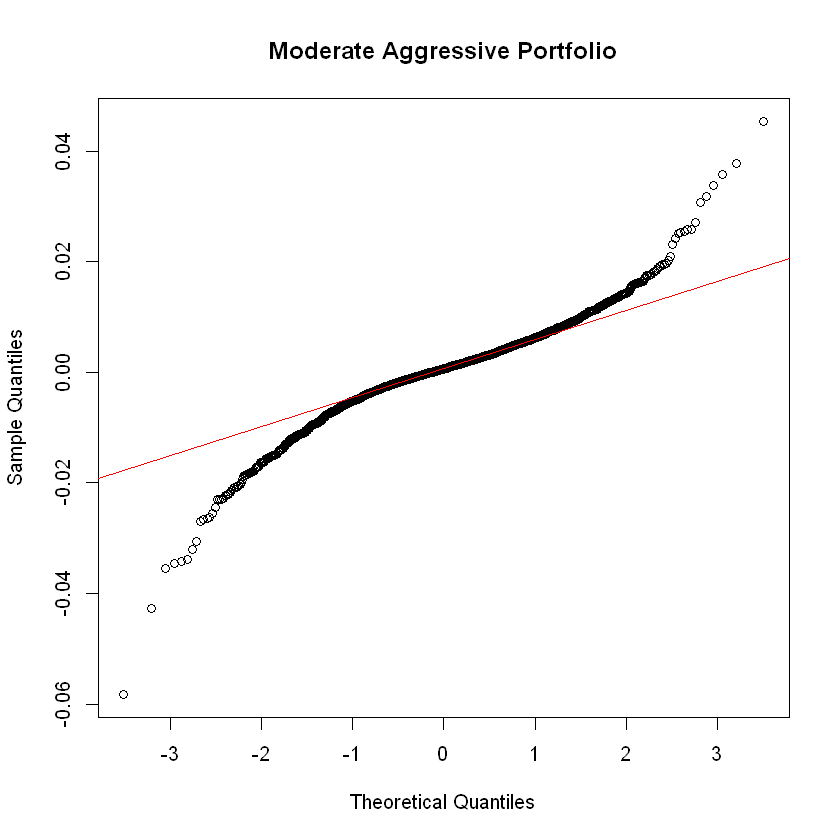

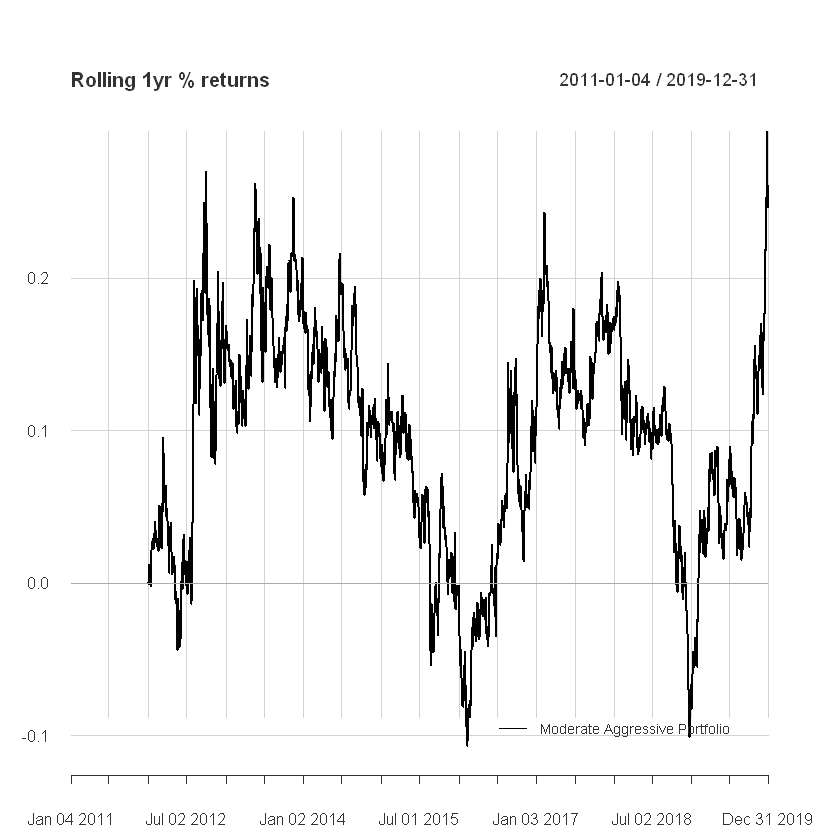

In [46]:
w <- c(.38, .14, .04, .08, .10,.10,.16)
portfolio.prices <- as.xts(merge(voo,vb,vwo,vnq,shy,lqd,vea))
portfolio.returns <- na.omit(ROC(portfolio.prices,1,"discrete"))
colnames(portfolio.returns) <- c("voo","vb","vwo","vnq","shy","lqd","vea")


portfolio.moderately_aggressive <-Return.portfolio(portfolio.returns,
                                 rebalance_on="months",
                                 weights=w,wealth.index=TRUE,verbose=TRUE)

returns <- portfolio.moderately_aggressive$returns
names(returns) <- c("Moderate Aggressive Portfolio")

# merge portfolio returns into one dataset
# label columns


chart.CumReturns(returns,
               wealth.index=TRUE,
               legend.loc="bottomright",
               main="Growth of $1 investment",
               ylab="$")
knitr::kable(rbind(table.AnnualizedReturns(returns),SharpeRatio.annualized(returns),CalmarRatio(returns)))
knitr::kable(table.Drawdowns(returns))
# Compare portfolio return distribution vs. normal distribution
qqnorm(returns,main="Moderate Aggressive Portfolio")
qqline(returns,col="red")
# Compare rolling 1-year returns
chart.RollingPerformance(returns,width=252,
                       legend.loc="bottomright",
                       main="Rolling 1yr % returns")

**Aggressive**



|                                | Aggressive Portfolio|
|:-------------------------------|--------------------:|
|Annualized Return               |            0.0988000|
|Annualized Std Dev              |            0.1495000|
|Annualized Sharpe (Rf=0%)       |            0.6605000|
|Annualized Sharpe Ratio (Rf=0%) |            0.6605443|
|Calmar Ratio                    |            0.4211492|



|From       |Trough     |To         |   Depth| Length| To Trough| Recovery|
|:----------|:----------|:----------|-------:|------:|---------:|--------:|
|2011-05-02 |2011-10-03 |2012-09-06 | -0.2345|    342|       108|      234|
|2018-08-30 |2018-12-24 |2019-04-05 | -0.1825|    150|        80|       70|
|2015-05-22 |2016-02-11 |2016-07-22 | -0.1821|    295|       183|      112|
|2018-01-29 |2018-02-08 |2018-08-29 | -0.0993|    149|         9|      140|
|2013-05-22 |2013-06-24 |2013-09-16 | -0.0863|     81|        23|       58|

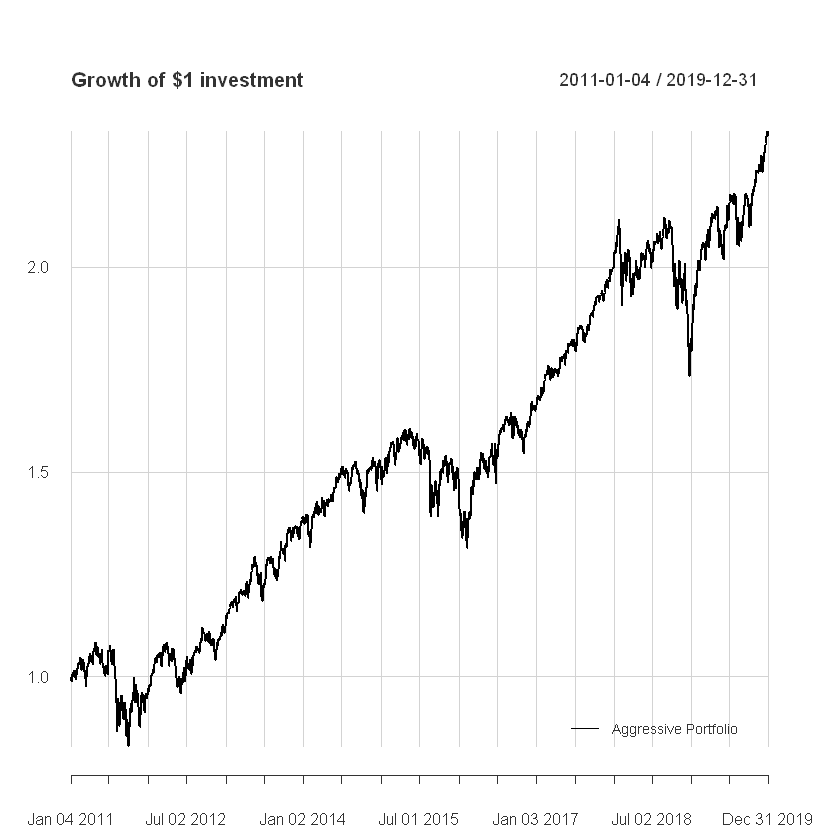

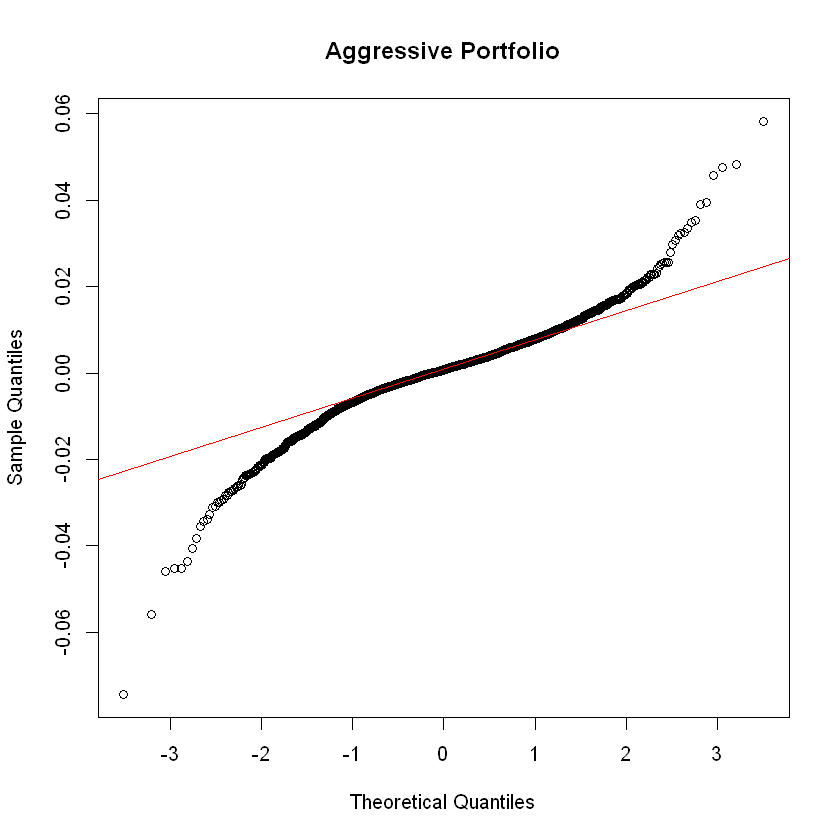

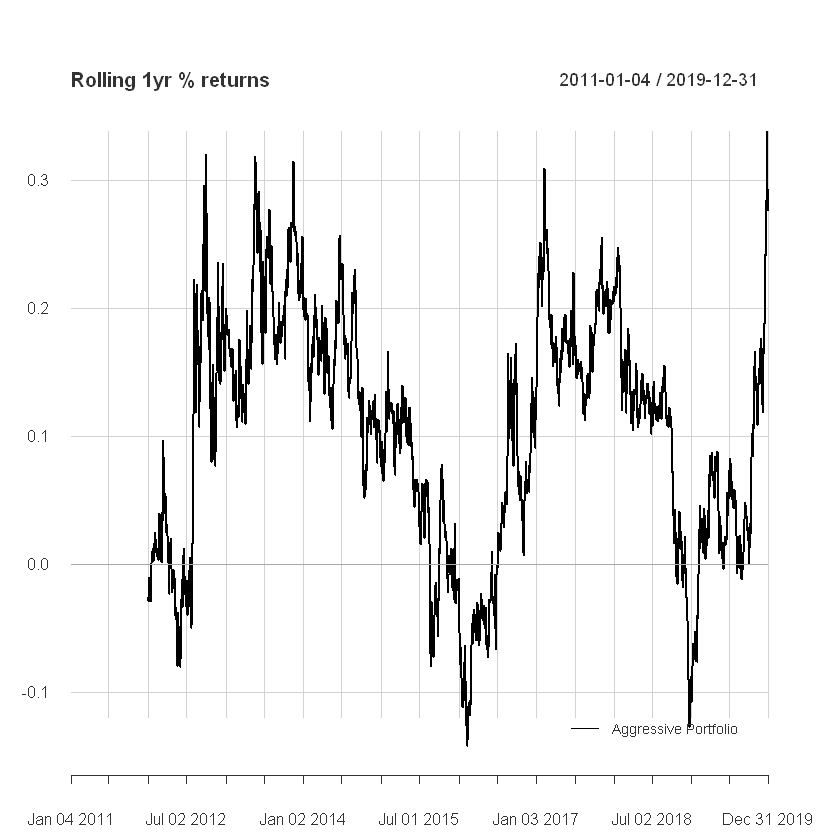

In [47]:
w <- c(.40, .20, .10, .10, .20)
portfolio.prices <- as.xts(merge(voo,vb,vwo,vnq,vea))
portfolio.returns <- na.omit(ROC(portfolio.prices,1,"discrete"))
colnames(portfolio.returns) <- c("voo","vb","vwo","vnq","vea")


portfolio.Aggressive <-Return.portfolio(portfolio.returns,
                                 rebalance_on="months",
                                 weights=w,wealth.index=TRUE,verbose=TRUE)

returns <- portfolio.Aggressive$returns
names(returns) <- c("Aggressive Portfolio")

# merge portfolio returns into one dataset
# label columns


chart.CumReturns(returns,
               wealth.index=TRUE,
               legend.loc="bottomright",
               main="Growth of $1 investment",
               ylab="$")
knitr::kable(rbind(table.AnnualizedReturns(returns),SharpeRatio.annualized(returns),CalmarRatio(returns)))
knitr::kable(table.Drawdowns(returns))
# Compare portfolio return distribution vs. normal distribution
qqnorm(returns,main="Aggressive Portfolio")
qqline(returns,col="red")
# Compare rolling 1-year returns
chart.RollingPerformance(returns,width=252,
                       legend.loc="bottomright",
                       main="Rolling 1yr % returns")

**Summary**



|                    | Conservative to Spyders| Moderately Conservative to Spyders| Moderate to Spyders| Moderately Aggressive to Spyders| Aggressive to Spyders|
|:-------------------|-----------------------:|----------------------------------:|-------------------:|--------------------------------:|---------------------:|
|Alpha               |                 -0.0004|                            -0.0003|             -0.0003|                          -0.0002|               -0.0001|
|Beta                |                  0.9990|                             0.9992|              0.9994|                           0.9997|                0.9999|
|Beta+               |                  1.0044|                             1.0034|              1.0024|                           1.0014|                1.0003|
|Beta-               |                  0.9999|                             0.9999|              0.9999|                           0.9999|                0.9998|
|R-squared           |    

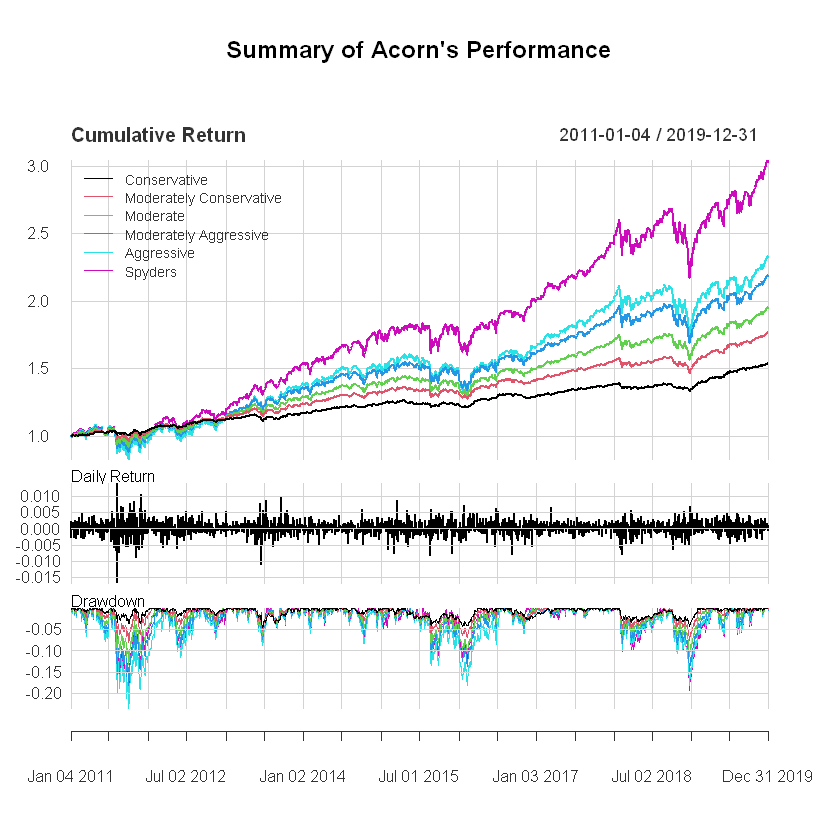

In [48]:
acorns.ports <- cbind(portfolio.conservative$returns,portfolio.moderately_conservative$returns,portfolio.moderate$returns,portfolio.moderately_aggressive$returns,portfolio.Aggressive$returns,returns.spy,returns.tbil) 
names(acorns.ports) <- c("Conservative","Moderately Conservative","Moderate","Moderately Aggressive","Aggressive","Spyders","US 3 Month")
knitr::kable(table.CAPM(acorns.ports[,1:5],acorns.ports[,6],Rf = acorns.ports[,7])) 
charts.PerformanceSummary(acorns.ports[,1:6],wealth.index = TRUE,Rf = acorns.ports[,7],main = "Summary of Acorn's Performance")

**Biased and un professional Observations**

In progress